<a href="https://colab.research.google.com/github/ak0982/AI-assignment/blob/master/ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  NAME --> AMAR KUMAR
#  ROLL NO --> 1801016
# ASSIGNMENT 3

# Simple Linear Regression (One feature)

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving slr06.xls to slr06.xls


*** No CODEPAGE record, no encoding_override: will use 'ascii'


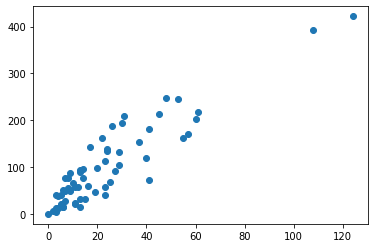

In [20]:
data=pd.read_excel('slr06.xls')

X=data['X']
Y=data['Y']
plt.scatter(X,Y)


**

```
# This is formatted as code
```

**SPLITTING OF DATA INTO 60% 20% 20%**

In [21]:
train, validate = train_test_split(data, test_size=0.2,random_state=1)
train,test=train_test_split( train, test_size=0.25)
print(train.shape)
print(validate.shape)
print(test.shape)

(37, 2)
(13, 2)
(13, 2)


**caluclate slope and y intercept OF OLS**


slope is 3.373994331800134
constant is 19.608288854088897


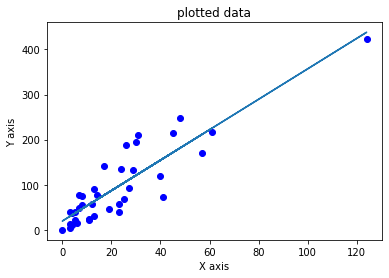

In [22]:
#calcute slope and y intercept
mean_train_x=np.mean(train['X'].to_numpy())
mean_train_y=np.mean(train['Y'].to_numpy())
#print('mean of train  data X is {}'.format(mean_train_x))
#print('mean of train data Y is {}'.format(mean_train_y))
train_x=train['X'].to_numpy()
train_y=train['Y'].to_numpy()
num=0
dem=0
for i in range(len(train['X'])):
  num +=(train_x[i]-mean_train_x)*(train_y[i]-mean_train_y)
  dem +=(train_x[i]-mean_train_x)**2

slope=num/dem
print('slope is {}'.format(slope))
const=mean_train_y-(mean_train_x*slope)
print('constant is {}'.format(const))

plt.plot(train['X'],slope*train['X']+const)
plt.scatter(train['X'],train['Y'],color='blue')
plt.title('plotted data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [7]:
def MAE(data):
  predict_output=slope*data['X']+const
  data_y=data['Y']
  data_mae=0
  for i in data.index:
    data_mae +=abs(data_y[i]-predict_output[i])

  data_mae /=len(data)
  return data_mae
  #print('MAE of train is '+str(data_mae))


In [8]:
print('MAE OF TRAIN IS {}'.format(MAE(train)))
print('MAE OF VALIDATE IS {}'.format(MAE(validate)))
print('MAE OF TEST IS {}'.format(MAE(test)))


MAE OF TRAIN IS 26.657289694571265
MAE OF VALIDATE IS 22.717231402323073
MAE OF TEST IS 42.12335784597432


# **Gradient Descent Algorithm (One feature)**

*** No CODEPAGE record, no encoding_override: will use 'ascii'


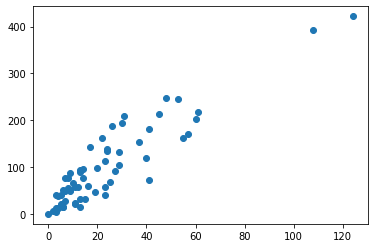

In [26]:
data=pd.read_excel('slr06.xls')

X=data['X']
Y=data['Y']
plt.scatter(X,Y)


**SPLITTING OF DATA INTO 60% 20% 20%**

In [34]:
train, validate = train_test_split(data, test_size=0.2,random_state=1)
train,test=train_test_split( train, test_size=0.25)
print(train.shape)
print(validate.shape)
print(test.shape)

(37, 2)
(13, 2)
(13, 2)


**CALCULTE SLOPE AND INTERCEPT OF Gradient Descent Algorithm**

SLOPE IS 3.6191005267329324
INTERCEPT IS 17.327429304164465


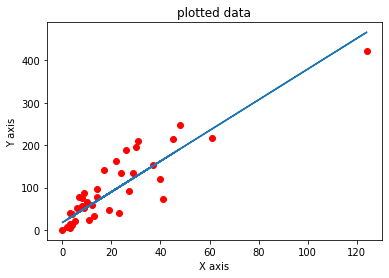

In [35]:
n = len(train['X'])
rate, iters = 0.0001, 10000
slope_g, const_g = 0, 0
for i in range(iters) :

  Y_pred = slope_g* train['X'] + const_g
  d_dm = (-2 / n) * (sum(train['X'] * (train['Y'] - Y_pred)))
  d_dc = (-2 / n) * (sum(train['Y'] - Y_pred))
  slope_g -= rate * d_dm
  const_g -= rate * d_dc

print('SLOPE IS {}'.format(slope_g))
print('INTERCEPT IS {}'.format(const_g))
plt.plot(train['X'],slope_g*train['X']+const_g)
plt.scatter(train['X'],train['Y'],color='red')
plt.title('plotted data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [36]:
def MAE_G(data):
  predict_output=slope_g*data['X']+const_g
  data_y=data['Y']
  data_mae=0
  for i in data.index:
    data_mae +=abs(data_y[i]-predict_output[i])

  data_mae /=len(data)
  return data_mae

**MAE OF TRAIN,VALIDATE AND TEST** 

In [37]:
print('MAE OF TRAIN IS {}'.format(MAE_G(train)))
print('MAE OF VALIDATE IS {}'.format(MAE_G(validate)))
print('MAE OF TEST IS {}'.format(MAE_G(test)))

MAE OF TRAIN IS 31.873366125179725
MAE OF VALIDATE IS 24.33735546897447
MAE OF TEST IS 25.588344460294216


# Multiple Linear Regression

***Loading...***

In [39]:
boston= load_boston()
data=pd.DataFrame(boston.data,columns=boston.feature_names)
print(data)
Y = boston.target
X = boston.data

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


**SPLITTING OF DATA INTO 60% 20% 20%**

In [40]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y ,test_size=0.2, random_state=1)
X_train, X_val,Y_train, Y_val = train_test_split( X_train,Y_train, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(323, 13)
(102, 13)
(81, 13)


**Standardising Data**

In [41]:

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val = scaler.fit_transform(X_val)
x_test = scaler.fit_transform(X_test)

train_data = pd.DataFrame(x_train)
train_data['price'] = Y_train
print(train_data.shape)

validate_data = pd.DataFrame(x_val)
validate_data['price'] = Y_val
print(validate_data.shape)

test_data = pd.DataFrame(x_test)
test_data['price'] = Y_test
print(test_data.shape)

(323, 14)
(81, 14)
(102, 14)


**Multiple Linear Regression Gradient Descent Algorithm**

In [42]:
# Multiple Linear Regression Gradient Descent Algorithm
def MLR_GDA(data, learning_rate, iters, sample_size) :
  w = np.zeros(shape = (1, data.shape[1] - 1))
  b = 0
  for iter in range(iters) :
    sample_data = data.sample(sample_size)
    y = np.array(sample_data['price'])
    x = np.array(sample_data.drop('price', axis = 1))
    w_g = np.zeros(shape = (1, data.shape[1] - 1))
    b_g = 0

    for i in range(sample_size) :
      y_pred = np.dot(w, x[i]) + b
      w_g += (-2) * (x[i]) * (y[i] - y_pred)
      b_g += (-2) * (y[i] - y_pred)
    w -= (learning_rate) * (w_g / sample_size)
    b -= (learning_rate) * (b_g / sample_size)
  return w, b

**Function of Mean Absolute Error**

In [43]:
def MAE_MLR(w, b, X, Y) :
  mae, n = 0, len(X)
  for i in range(n):
    y_pred = np.dot(w, X[i]) + b
    mae += abs(Y[i] - y_pred)
  mae = mae/n
  return mae
weight, bias = MLR_GDA(train_data, 0.001, 1000, 10)
print('WEIGHT IS \n{} and \n bias is\n{}'.format(weight,bias))

WEIGHT IS 
[[-0.80520987  0.47484798 -0.33904495  0.75714829 -0.76393763  2.32794265
  -0.27712923 -1.18304452  0.37341106 -0.13045442 -1.72950751  0.48642351
  -3.21154232]] and 
 bias is
[19.55579163]


**MAE VALUE OF TRAIN , VALIDATE AND TEST**

In [44]:
y = np.array(train_data['price'])
x = np.array(train_data.drop('price', axis = 1))
print("MAE OF TRAIN IS : {}" .format(MAE_MLR(weight, bias, x, y)))
y = np.array(validate_data['price'])
x = np.array(validate_data.drop('price', axis = 1))
print("MAE OF VALIDATE IS : {}" .format(MAE_MLR(weight, bias, x, y)))
y = np.array(test_data['price'])
x = np.array(test_data.drop('price', axis = 1))
print("MAE OF TEST IS : {}" .format(MAE_MLR(weight, bias, x, y)))

MAE OF TRAIN IS : [3.87967882]
MAE OF VALIDATE IS : [3.28869927]
MAE OF TEST IS : [3.99927247]
